# ノック71 - 人間関係のネットワークの可視化

In [1]:
import pandas as pd
import numpy as np
import random

あるブランドのSNS上での影響力を分析していく。  
SNS上での顧客同士のつながりや使用率のデータを用いていく。

まずは使用する全データを読み込む。

In [2]:
# リピーターがSNSのリピーター同士で繋がっているかどうか(20人のみ)
# つながっている場合は1

twenty = pd.read_csv("links.csv")
twenty = twenty.pivot_table(index = "Unnamed: 0")
twenty.head()

,Node0,Node1,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
Node0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Node11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# SNSのリピーター同士で繋がっているかどうか(全リピーター540人)

all_mem = pd.read_csv("links_members.csv")
all_mem.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# リピーターが月毎にSNSにログインしているかどうか
# ログインしている時は1

info = pd.read_csv("info_members.csv")
info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


次に、networkxを用いてtwentyのつながりを可視化していく。

In [5]:
import networkx as nx
from itertools import product 

In [6]:
twenty.head()

,Node0,Node1,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
Node0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Node10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
Node11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Node12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
# index, columnsから"Node"という文字を省く

twenty = twenty.rename(index = lambda x: x.replace("Node", ""),columns = lambda x: x.replace("Node", ""))
twenty.head()

,0,1,10,11,12,13,14,15,16,17,18,19,2,3,4,5,6,7,8,9
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# nodes同士のつながり(枝)を作成する

result_list = list([])

for i in range(len(twenty)):
    nodes_list = twenty.loc[twenty.iloc[i,:] == 1, twenty.index[i]].index
    nodes_combi = list(product(twenty.index[i], nodes_list))
    result_list = result_list + nodes_combi

result_list


[('0', '15'),
 ('0', '5'),
 ('1', '11'),
 ('1', '13'),
 ('1', '16'),
 ('1', '5'),
 ('1', '11'),
 ('1', '2'),
 ('1', '4'),
 ('1', '7'),
 ('0', '11'),
 ('0', '2'),
 ('0', '4'),
 ('0', '7'),
 ('1', '1'),
 ('1', '10'),
 ('1', '1'),
 ('1', '10'),
 ('1', '13'),
 ('1', '16'),
 ('1', '9'),
 ('2', '13'),
 ('2', '16'),
 ('2', '9'),
 ('1', '1'),
 ('1', '12'),
 ('1', '18'),
 ('1', '8'),
 ('3', '1'),
 ('3', '12'),
 ('3', '18'),
 ('3', '8'),
 ('1', '8'),
 ('4', '8'),
 ('1', '0'),
 ('1', '19'),
 ('1', '3'),
 ('1', '4'),
 ('5', '0'),
 ('5', '19'),
 ('5', '3'),
 ('5', '4'),
 ('1', '1'),
 ('1', '12'),
 ('1', '17'),
 ('6', '1'),
 ('6', '12'),
 ('6', '17'),
 ('1', '16'),
 ('1', '18'),
 ('1', '6'),
 ('1', '7'),
 ('7', '16'),
 ('7', '18'),
 ('7', '6'),
 ('7', '7'),
 ('1', '13'),
 ('1', '17'),
 ('1', '5'),
 ('8', '13'),
 ('8', '17'),
 ('8', '5'),
 ('1', '15'),
 ('9', '15'),
 ('2', '10'),
 ('2', '4'),
 ('2', '5'),
 ('2', '6'),
 ('3', '15'),
 ('3', '7'),
 ('4', '10'),
 ('4', '15'),
 ('4', '2'),
 ('4', '7'),
 (

In [9]:
unique_rl = []
for j in range(len(result_list)):
    if result_list[j][0] != result_list[j][1]:
        unique_rl.append(result_list[j])
unique_rl

[('0', '15'),
 ('0', '5'),
 ('1', '11'),
 ('1', '13'),
 ('1', '16'),
 ('1', '5'),
 ('1', '11'),
 ('1', '2'),
 ('1', '4'),
 ('1', '7'),
 ('0', '11'),
 ('0', '2'),
 ('0', '4'),
 ('0', '7'),
 ('1', '10'),
 ('1', '10'),
 ('1', '13'),
 ('1', '16'),
 ('1', '9'),
 ('2', '13'),
 ('2', '16'),
 ('2', '9'),
 ('1', '12'),
 ('1', '18'),
 ('1', '8'),
 ('3', '1'),
 ('3', '12'),
 ('3', '18'),
 ('3', '8'),
 ('1', '8'),
 ('4', '8'),
 ('1', '0'),
 ('1', '19'),
 ('1', '3'),
 ('1', '4'),
 ('5', '0'),
 ('5', '19'),
 ('5', '3'),
 ('5', '4'),
 ('1', '12'),
 ('1', '17'),
 ('6', '1'),
 ('6', '12'),
 ('6', '17'),
 ('1', '16'),
 ('1', '18'),
 ('1', '6'),
 ('1', '7'),
 ('7', '16'),
 ('7', '18'),
 ('7', '6'),
 ('1', '13'),
 ('1', '17'),
 ('1', '5'),
 ('8', '13'),
 ('8', '17'),
 ('8', '5'),
 ('1', '15'),
 ('9', '15'),
 ('2', '10'),
 ('2', '4'),
 ('2', '5'),
 ('2', '6'),
 ('3', '15'),
 ('3', '7'),
 ('4', '10'),
 ('4', '15'),
 ('4', '2'),
 ('4', '7'),
 ('4', '8'),
 ('5', '0'),
 ('5', '1'),
 ('5', '18'),
 ('5', '2'),
 

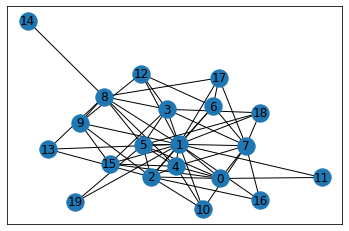

In [10]:
# networkxを用いて可視化する

G = nx.Graph()
G.add_nodes_from(twenty.columns[i] for i in range(len(twenty.columns)))
G.add_edges_from(unique_rl)
nx.draw_networkx(G)

# ノック72 - 口コミによる情報伝播の様子を可視化する (ここから自身の解答)

次に、一つの口コミが時間によってどれほど伝播していくのかを可視化する。  
  
条件としては、以下の通り

①一つの口コミは、ネットワーク上で繋がっている人に毎月1/10の確率で伝播する  
②口コミが伝播した点・辺は赤くなる  
  
以上を可視化し、月毎にどのように口コミが伝わっていくのかを可視化する。

まずは、ノードの組み合わせから重複している辺を無くす。

In [425]:
# 完全に重複している辺を削除

unique_rl = set(unique_rl)

In [426]:
# set型をリスト型に変換する

unique_rl = list(unique_rl)

In [427]:
# 順序は違うが、構成される数字が同じエッジ(同じ組み合わせ)を削除
for i in range(len(unique_rl)):
    for j in range(1, len(unique_rl) - 1 - i):
        if unique_rl[i][0] == unique_rl[i + j][1] and unique_rl[i][1] == unique_rl[i + j][0]:
                unique_rl.pop(i + j)
unique_edges = unique_rl           

In [428]:
# 上記のエッジをグラフに代入

G.add_edges_from(unique_edges)

ここから関数を組んでいく。

In [429]:
def first_answer():
    #ノード(first number)をランダムで一つ選択する
    nodes_lst = []
    for i in range(len(twenty.columns)):
        nodes_lst.append(twenty.columns[i])

    first_number = random.choice(nodes_lst)

    #ノードを抽出する関数を作成する

    def chosen_lst():   
        # first numberにつながっているエッジを列挙
        red_edges = []

        for i in range(len(unique_rl)):
            if unique_rl[i][0] == str(first_number) or unique_rl[i][1] == first_number:
                red_edges.append(unique_rl[i]) 
        red_edges

        # 選んだエッジにつながっているノードを列挙
        connected_nodes = []
        for i in range(len(red_edges)):
            if red_edges[i][0] == first_number:
                connected_nodes.append(red_edges[i][1])
            elif red_edges[i][1] == first_number:
                connected_nodes.append(red_edges[i][0])
        connected_nodes

        # 繋がっているノードから、それぞれ1/10の確率でノードを抽出 & 辺を作成
    
        turned_nodes = []
        for i in range(len(connected_nodes)):
            if random.random() <= 0.1:
                turned_nodes.append(connected_nodes[i])
        return  turned_nodes        
    
    # 上記で抽出された数字を固定
    new_nodes = chosen_lst()
    
    # 抽出されたノードとfirst numberをつなぐエッジを作成
    def turned_edges():
        turned_edges = []
        for i in range(len(new_nodes)):
            turned_edges.append((first_number, new_nodes[i]))
        return turned_edges

    turned_edges = turned_edges()
    
    # 初めに選ばれたノードを追加
    new_nodes.append(first_number)
    
    # 描画
    node_c = ['orangered' if i in new_nodes else 'cornflowerblue' for i in G.nodes()]
    edge_c = ['orangered' if j in turned_edges else 'cornflowerblue' for j in G.edges()]
    nx.draw_networkx(G, node_color = node_c, edge_color = edge_c)    
    
    return new_nodes, turned_edges

(['3', '8'], [('8', '3')])

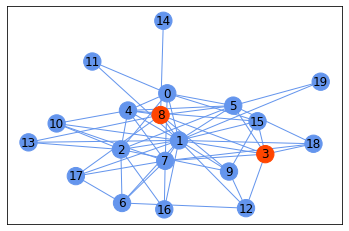

In [430]:
first_answer()

ここまでで、  
①ランダムな数字を最初に一つ選ぶ  
②そこからつながっている数値からランダムに1/10の確率で点を抽出する  
③①と②のつながりを赤くする  
までは出来た

次に、2回目の動作を追加していく

['2', '10']

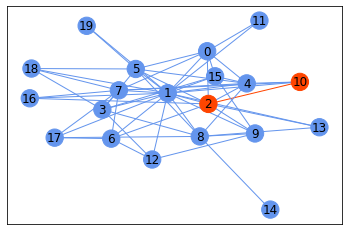

In [404]:
# 1回目の動作の数値を固定

new_nodes2 = first_answer()[0]
new_nodes2

In [412]:
#ノードを抽出する関数を作成する

def chosen_lst2():   
    # new_nodesにつながっているエッジを列挙
    red_edges2 = []
    for j in range(len(new_nodes2)):
        for i in range(len(unique_rl)):
            if unique_rl[i][0] == str(new_nodes2[j]) or unique_rl[i][1] == str(new_nodes2[j]):
                red_edges2.append(unique_rl[i]) 
    return red_edges2
red_edges2 = chosen_lst2()
red_edges2

[('2', '13'),
 ('2', '10'),
 ('2', '9'),
 ('2', '6'),
 ('2', '16'),
 ('2', '5'),
 ('1', '2'),
 ('2', '4'),
 ('0', '2'),
 ('2', '10'),
 ('4', '10'),
 ('7', '10'),
 ('1', '10')]

In [419]:
# 選んだエッジにつながっているノードを列挙
connected_nodes2 = []
for j in range(len(new_nodes2)):
    for i in range(len(red_edges2)):
        if red_edges2[i][0] == new_nodes2[j] :
            connected_nodes2.append(red_edges2[i][1])
        elif red_edges2[i][1] == new_nodes2[j]:
            connected_nodes2.append(red_edges2[i][0])
connected_nodes2 = list(set(connected_nodes2))
connected_nodes2

['4', '7', '5', '10', '13', '1', '6', '16', '9', '2', '0']

In [424]:
# 繋がっているノードから、それぞれ1/10の確率でノードを抽出 & 辺を作成
def chosen_nodes2():
    turned_nodes = []
    for i in range(len(connected_nodes2)):
        if random.random() <= 0.1:
            turned_nodes.append(connected_nodes2[i])
    return  turned_nodes

# 上記で抽出された数字を固定
new_nodes2 = chosen_nodes2()
new_nodes2

['13', '6']

次に抽出されたノードとnew_nodesをつなぐエッジを作成しようとした。  
しかし、例えば今回のケースで言うと"2"と"10"それぞれにつながれているノードを別々で処理する必要があり、どのように処理するかでつまづいた。  
またここまでで数日かかっている事もあり、ここで解答を確認。